In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df = pd.read_excel("D:\BTP\Gopalkheda and yerli\Combined model\combined.xlsx")
df

,Year,Month,Day,Discharge,cluster,RF101,RF101(t-1),RF101(t-2),RF117,RF117(t-1),...,cluster(t-1),cluster(t-2),Q(t-1),Q(t-2),Q(t-3),base flow,Lump temp(t-1),T5(t-1),T10(t-1),T11(t-1)
0,1977,6,1,0.3,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.15,0.000000,0.00,0.00,0.00
1,1977,6,2,0.3,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.3,0.0,0.0,0.15,34.147357,34.10,33.25,33.95
2,1977,6,3,0.3,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.3,0.3,0.0,0.15,33.897445,33.60,33.05,33.85
3,1977,6,4,0.3,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.3,0.3,0.3,0.15,34.300330,34.35,33.55,34.30
4,1977,6,5,0.3,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.3,0.3,0.3,0.15,35.223726,34.90,34.45,35.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16066,2021,5,27,0.0,0.0083,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.00,33.078998,33.55,33.60,33.15
16067,2021,5,28,0.0,0.0000,0.0,0.0,0.0,5.2,0.0,...,0.0083,0.0000,0.0,0.0,0.0,0.00,32.852387,33.30,33.30,32.80
16068,2021,5,29,0.0,0.1713,0.4,0.0,0.0,0.0,5.2,...,0.0000,0.0083,0.0,0.0,0.0,0.00,33.126443,33.30,33.25,33.15
16069,2021,5,30,0.0,1.0604,1.2,0.4,0.0,0.0,0.0,...,0.1713,0.0000,0.0,0.0,0.0,0.00,33.681231,34.05,33.95,34.00


In [3]:
df1 = df[0:12418]
df2 = df[12418:]
df1

,Year,Month,Day,Discharge,cluster,RF101,RF101(t-1),RF101(t-2),RF117,RF117(t-1),...,cluster(t-1),cluster(t-2),Q(t-1),Q(t-2),Q(t-3),base flow,Lump temp(t-1),T5(t-1),T10(t-1),T11(t-1)
0,1977,6,1,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.15,0.000000,0.00,0.00,0.00
1,1977,6,2,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.3,0.0,0.0,0.15,34.147357,34.10,33.25,33.95
2,1977,6,3,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.3,0.3,0.0,0.15,33.897445,33.60,33.05,33.85
3,1977,6,4,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.3,0.3,0.3,0.15,34.300330,34.35,33.55,34.30
4,1977,6,5,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.3,0.3,0.3,0.15,35.223726,34.90,34.45,35.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12413,2011,5,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,32.227197,31.90,31.95,32.60
12414,2011,5,28,0.0,0.0,0.0,0.0,0.0,1.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,34.000740,34.20,33.50,33.95
12415,2011,5,29,0.0,0.0,0.0,0.0,0.0,0.0,1.1,...,0.0,0.0,0.0,0.0,0.0,0.00,34.003303,34.15,33.75,34.20
12416,2011,5,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,34.703793,35.10,34.90,34.80


In [4]:
df2

,Year,Month,Day,Discharge,cluster,RF101,RF101(t-1),RF101(t-2),RF117,RF117(t-1),...,cluster(t-1),cluster(t-2),Q(t-1),Q(t-2),Q(t-3),base flow,Lump temp(t-1),T5(t-1),T10(t-1),T11(t-1)
12418,2011,6,1,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,34.825286,35.00,34.10,34.75
12419,2011,6,2,0.0,0.0735,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,33.899992,34.25,33.55,33.70
12420,2011,6,3,0.0,0.4980,0.0,0.0,0.0,4.9,0.0,...,0.0735,0.0000,0.0,0.0,0.0,0.0,33.400491,33.65,33.35,33.30
12421,2011,6,4,0.0,0.0415,0.0,0.0,0.0,2.0,4.9,...,0.4980,0.0735,0.0,0.0,0.0,0.0,31.123140,31.15,30.40,30.95
12422,2011,6,5,0.0,0.0000,0.0,0.0,0.0,0.0,2.0,...,0.0415,0.4980,0.0,0.0,0.0,0.0,29.703559,29.45,29.95,30.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16066,2021,5,27,0.0,0.0083,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,33.078998,33.55,33.60,33.15
16067,2021,5,28,0.0,0.0000,0.0,0.0,0.0,5.2,0.0,...,0.0083,0.0000,0.0,0.0,0.0,0.0,32.852387,33.30,33.30,32.80
16068,2021,5,29,0.0,0.1713,0.4,0.0,0.0,0.0,5.2,...,0.0000,0.0083,0.0,0.0,0.0,0.0,33.126443,33.30,33.25,33.15
16069,2021,5,30,0.0,1.0604,1.2,0.4,0.0,0.0,0.0,...,0.1713,0.0000,0.0,0.0,0.0,0.0,33.681231,34.05,33.95,34.00


In [5]:
r1 = linear_model.LinearRegression()
r1.fit(df1[["cluster","Q(t-1)"]],df1.Discharge)
predicted = r1.predict(df2[["cluster","Q(t-1)"]])
print(r1.coef_, r1.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

[29.10845242  0.54444459] -3.6671117883139672 0.5458289364995503 110.12362509693098


In [6]:
r1 = linear_model.LinearRegression()
r1.fit(df1[["cluster","Q(t-1)","Q(t-2)"]],df1.Discharge)
predicted = r1.predict(df2[["cluster","Q(t-1)","Q(t-2)"]])
print(r1.coef_, r1.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

[29.15998768  0.60145945 -0.09205483] -2.5940940434832243 0.555223769786312 108.9786826305021


In [7]:
r1 = linear_model.LinearRegression()
r1.fit(df1[["cluster","Q(t-1)","RF101(t-1)"]],df1.Discharge)
predicted = r1.predict(df2[["cluster","Q(t-1)","RF101(t-1)"]])
print(r1.coef_, r1.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

[25.80123451  0.50552742  1.78576528] -5.199720893959672 0.5715254734973898 106.96292551283311


In [8]:
r1 = linear_model.LinearRegression()
r1.fit(df1[["cluster","Q(t-1)","RF117(t-1)"]],df1.Discharge)
predicted = r1.predict(df2[["cluster","Q(t-1)","RF117(t-1)"]])
print(r1.coef_, r1.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

[23.40629717  0.48311094  2.52167108] -6.293335395931706 0.5836688874459481 105.43631100188078


In [9]:
r1 = linear_model.LinearRegression()
r1.fit(df1[["cluster","Q(t-1)","RF80(t-1)"]],df1.Discharge)
predicted = r1.predict(df2[["cluster","Q(t-1)","RF80(t-1)"]])
print(r1.coef_, r1.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

[23.93580308  0.49056031  3.03586141] -5.864014860354381 0.5825654832690683 105.57593770893547


In [10]:
r1 = linear_model.LinearRegression()
r1.fit(df1[["cluster(t-1)","Q(t-1)","RF117(t-1)","RF101"]],df1.Discharge)
predicted = r1.predict(df2[["cluster(t-1)","Q(t-1)","RF117(t-1)","RF101"]])
print(r1.coef_, r1.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

[8.29789904 0.46708927 2.15841535 3.39109092] -4.394546037162392 0.5875126187826474 104.94846781228833


In [11]:
r1 = linear_model.LinearRegression()
r1.fit(df1[["Q(t-1)","Q(t-2)","RF117(t-1)","RF101"]],df1.Discharge)
predicted = r1.predict(df2[["Q(t-1)","Q(t-2)","RF117(t-1)","RF101"]])
print(r1.coef_, r1.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

[ 0.53579259 -0.06727781  2.92979128  3.65435528] -2.4837396955442443 0.5896455809906208 104.67677313916245


In [12]:
r1 = linear_model.LinearRegression()
r1.fit(df1[["Q(t-1)","Q(t-2)","RF117(t-1)","cluster"]],df1.Discharge)
predicted = r1.predict(df2[["Q(t-1)","Q(t-2)","RF117(t-1)","cluster"]])
print(r1.coef_, r1.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

[ 0.5265714  -0.06501077  2.39028957 23.73978011] -5.398722188977736 0.5880298594943861 104.88264683127775


In [14]:
r1 = linear_model.LinearRegression()
r1.fit(df1[["Q(t-1)","T10(t-1)","RF117(t-1)","Lump temp(t-1)"]],df1.Discharge)
predicted = r1.predict(df2[["Q(t-1)","T10(t-1)","RF117(t-1)","Lump temp(t-1)"]])
print(r1.coef_, r1.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

[ 0.48291499  5.46804091  4.51085683 -5.66300432] 6.523832753873599 0.5272017411589857 112.35921677085283


In [ ]:
r1 = linear_model.LinearRegression()
r1.fit(df1[["Q(t-1)","T5","RF101(t-1)","Lump temp","RF101"]],df1.Discharge)
predicted = r1.predict(df2[["Q(t-1)","T5","RF101(t-1)","Lump temp","RF101"]])
print(r1.coef_, r1.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

In [ ]:
r1 = linear_model.LinearRegression()
r1.fit(df1[["Q(t-1)","Q(t-2)","RF117(t-1)","RF101","T11"]],df1.Discharge)
predicted = r1.predict(df2[["Q(t-1)","Q(t-2)","RF117(t-1)","RF101","T11"]])
print(r1.coef_, r1.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

In [ ]:
r1 = linear_model.LinearRegression()
r1.fit(df1[["Q(t-1)","Q(t-2)","RF117(t-1)","RF101","cluster(t-2)"]],df1.Discharge)
predicted = r1.predict(df2[["Q(t-1)","Q(t-2)","RF117(t-1)","RF101","cluster(t-2)"]])
print(r1.coef_, r1.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


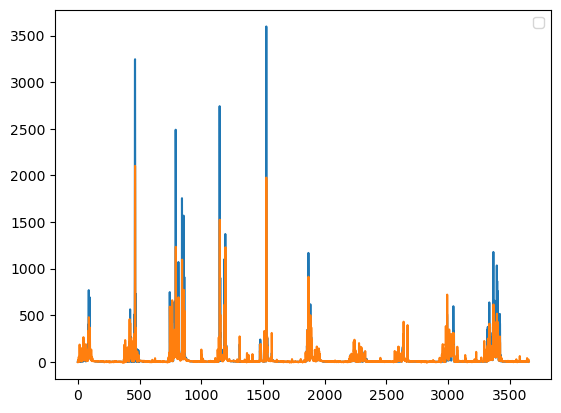

In [15]:
r = df2["Discharge"].size
plt.plot(range(r) , df2.Discharge)
plt.plot(range(r), predicted)
plt.legend()
plt.show()

In [ ]:
r1 = linear_model.LinearRegression()
r1.fit(df1[["Q(t-1)","Q(t-2)","RF117(t-1)","RF101","cluster(t-1)"]],df1.Discharge)
predicted = r1.predict(df2[["Q(t-1)","Q(t-2)","RF117(t-1)","RF101","cluster(t-1)"]])
print(r1.coef_, r1.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

In [ ]:
r1 = linear_model.LinearRegression()
r1.fit(df1[["Q(t-1)","Lump temp","RF117(t-1)","RF101","cluster(t-2)"]],df1.Discharge)
predicted = r1.predict(df2[["Q(t-1)","Lump temp","RF117(t-1)","RF101","cluster(t-2)"]])
print(r1.coef_, r1.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))

In [ ]:
r1 = linear_model.LinearRegression()
r1.fit(df1[["Q(t-1)","Q(t-2)","Q(t-3)","cluster(t-1)","RF117","RF80(t-1)"]],df1.Discharge)
predicted = r1.predict(df2[["Q(t-1)","Q(t-2)","Q(t-3)","cluster(t-1)","RF117","RF80(t-1)"]])
print(r1.coef_, r1.intercept_, r2_score(df2.Discharge, predicted), mean_squared_error(df2.Discharge, predicted,squared = False))